In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Aquifer_Petrignano.csv")
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [3]:
# Remove old rows
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Remove not usefull columns
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [4]:
# Simplify column names
df.columns = ['date', 'rainfall', 'depth to groundwater', 'temperature', 'drainage volume', 'river hydrometry']

targets = ['depth to groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,date,rainfall,depth to groundwater,temperature,drainage volume,river hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [5]:
from datetime import datetime, date 

df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

,date,rainfall,depth to groundwater,temperature,drainage volume,river hydrometry
0,2009-01-01 00:00:00,0.000000,-31.140000,5.200000,-24530.688000,2.400000
1,2009-01-02 00:00:00,0.000000,-31.110000,2.300000,-28785.888000,2.500000
2,2009-01-03 00:00:00,0.000000,-31.070000,4.400000,-25766.208000,2.400000
3,2009-01-04 00:00:00,0.000000,-31.050000,0.800000,-27919.296000,2.400000
4,2009-01-05 00:00:00,0.000000,-31.010000,-1.900000,-29854.656000,2.300000


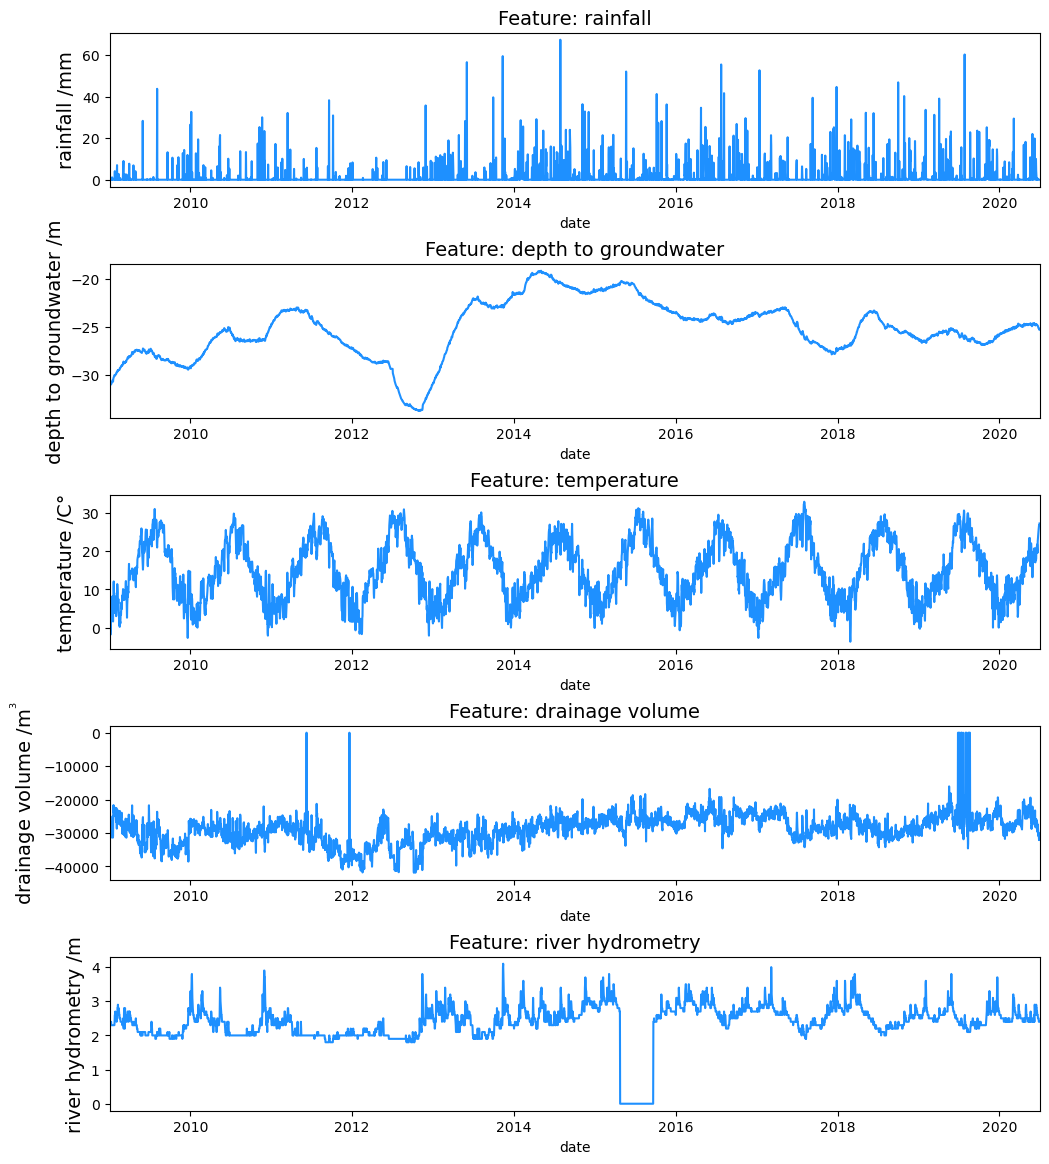

In [6]:
# To compelte the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(12, 14))
plt.subplots_adjust(hspace=0.5)

features_lebel = ['rainfall /mm', 'depth to groundwater /m', 'temperature /C°', r'drainage volume /m$^{\mathrm{}^3}$', 'river hydrometry /m']
for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column].ffill(), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=features_lebel[i], fontsize=14)
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])  

In [7]:
df = df.sort_values(by='date')

# Check time intervals
df['delta'] = df['date'] - df['date'].shift(1)

df[['date', 'delta']].head()

,date,delta
0,2009-01-01,NaT
1,2009-01-02,1 days
2,2009-01-03,1 days
3,2009-01-04,1 days
4,2009-01-05,1 days


In [8]:
df['delta'].sum(), df['delta'].count()

(Timedelta('4198 days 00:00:00'), 4198)

In [9]:
df = df.drop('delta', axis=1)
df.isna().sum()

date                     0
rainfall                 0
depth to groundwater    27
temperature              0
drainage volume          1
river hydrometry         0
dtype: int64

(14245.0, 18443.0)

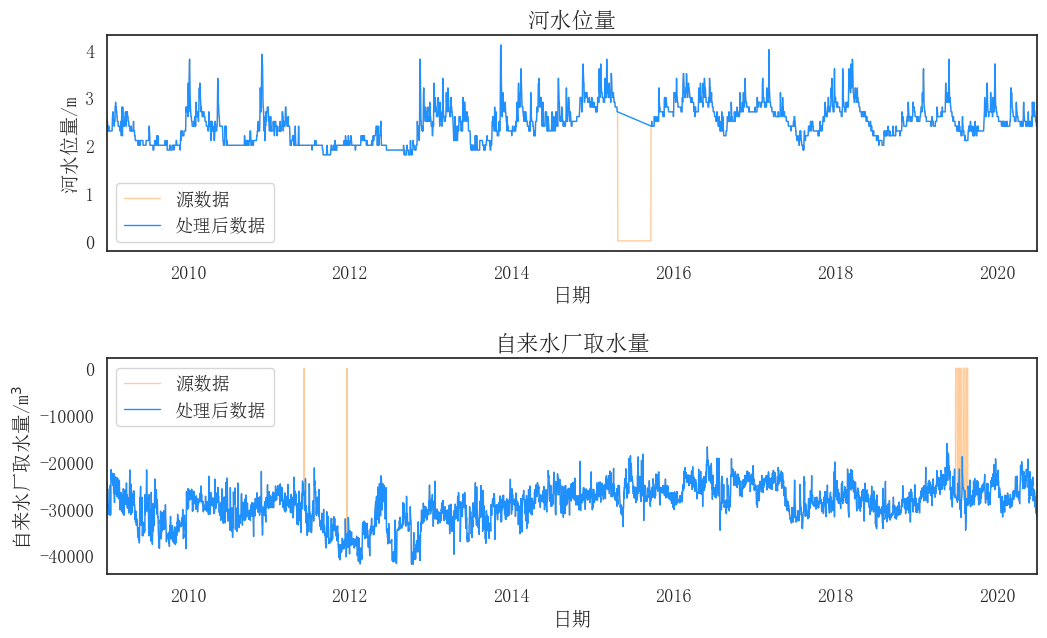

In [ ]:
plt.rcParams['font.sans-serif'] = ['SimSun']  
plt.rcParams['axes.unicode_minus'] = False

sns.set_theme(style="white", palette="tab10", font_scale=1.2, rc={"lines.linewidth": 1},font='SimSun')

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 7))
plt.subplots_adjust(hspace=0.5)

old_hydrometry = df['river hydrometry'].copy()
df['river hydrometry'] = df['river hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='源数据')
sns.lineplot(x=df['date'], y=df['river hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='处理后数据')
ax[0].set_title('河水位量', fontsize=16)
ax[0].set_ylabel(ylabel='河水位量/m', fontsize=14)
ax[0].set_xlabel(xlabel='日期', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = df['drainage volume'].copy()
df['drainage volume'] = df['drainage volume'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_drainage, ax=ax[1], color='darkorange', label='源数据')
sns.lineplot(x=df['date'], y=df['drainage volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='处理后数据')
ax[1].set_title('自来水厂取水量', fontsize=16)
ax[1].set_ylabel(ylabel='自来水厂取水量/m$^3$', fontsize=14)
ax[1].set_xlabel(xlabel='日期', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])